In [1]:
# Set up.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

np.random.seed(42)

%load_ext autoreload
%autoreload 2

As annotated in the README, determining course and speed of ships using bearings only simply isn't possible. This is already pretty well documented, but even trying to apply machine learning algorithms results in way too many ambiguous solutions.

I will have to make some of the images myself. I'm going to make a list of colors that I'll need.

I found a diagram of light orientations that I'm going to use.

In [2]:
targets = np.array(['Power-driven vessel underway (>50m in length) (starboard)',
                    'Power-driven vessel underway (>50m in length) (port)',
                    'Power-driven vessel underway (>50m in length) (stern)',
                    'Power-driven vessel underway (>50m in length) (bow)',
                    'Power-driven vessel underway (<50m in length) (starboard)',
                    'Power-driven vessel underway (<50m in length) (port)',
                    'Power-driven vessel underway (<50m in length) (stern)',
                    'Power-driven vessel underway (<50m in length) (bow)',
                    'Power-driven vessel underway (<12m in length) (starboard)',
                    'Power-driven vessel underway (<12m in length) (port)',
                    'Power-driven vessel underway (<12m in length) (stern)',
                    'Power-driven vessel underway (<12m in length) (bow)',
                    'Power-driven vessel underway (<7m in length) (starboard)',
                    'Power-driven vessel underway (<7m in length) (port)',
                    'Power-driven vessel underway (<7m in length) (stern)',
                    'Power-driven vessel underway (<7m in length) (bow)'], dtype=np.dtype('unicode_'))

In [3]:
colors = np.array([[(255, 0, 0), (255, 255, 255), (0, 255, 0)],
                [(0, 0, 0), (255, 255, 0), (0, 0, 0)]], dtype=np.uint8)

In [4]:
black = [[(0, 0, 0) for _ in range(255)] for _ in range(255)]

In [5]:
black_array = np.array(black, dtype=np.uint8)

In [6]:
black_array[100:110, 100:110] = (255, 255, 255)

In [7]:
black_array.shape

(255, 255, 3)

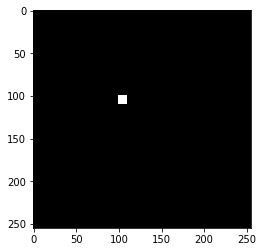

In [8]:
plt.imshow(black_array)
plt.show();

In [9]:
test_black = np.zeros((255, 255, 3))

In [10]:
raveled = np.ravel(test_black)

In [11]:
raveled.reshape(255, 255, 3)
reshaped = raveled.reshape(255, 255, 3)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,

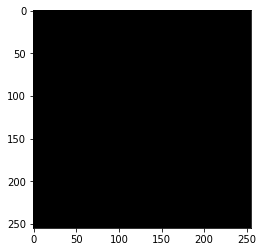

In [13]:
plt.imshow(test_black)
plt.show();

In [14]:
def stern_light_array_generator():
    """
    Makes a numpy array of a lot of different arrays meant to behave as an image of a stern light. 
    The color of stern lights is white, so this is fairly straight forward with a bunch of zeros.
    """
    min_pixel_bound = 50
    max_pixel_bound = 200
    total_gens = np.random.randint(500, 701)
    all_stern_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        light_width = np.random.randint(10, 51)
        start_x = np.random.randint(min_pixel_bound, max_pixel_bound)
        start_y = np.random.randint(min_pixel_bound, max_pixel_bound)
        new_array = np.zeros((255, 255, 3))
        aggregate_horiz = start_x + light_width
        aggregate_vert = start_y + light_width
        new_array[start_x:aggregate_horiz, start_y:aggregate_vert] = (255, 255, 255)
        # import pdb; pdb.set_trace()
        new_array = new_array.flatten()
        all_stern_images[i] = new_array

    return all_stern_images


In [15]:
stern_images = stern_light_array_generator()

In [16]:
len(stern_images[402])

195075

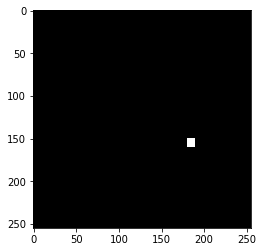

In [29]:
plt.imshow(stern_images[33].reshape(255, 255, 3))
plt.show();